## Beijing Multi-Site Air-Quality Data
##### Janardan Devkota

#### Build a neuron network with two hidden layers of 20 and 10 neurons to forecast wd using all other features and PyTorch. Does it overfit or underfit the data? Please justify your answer.

In [1]:
# Import libraries
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Disable all warnings in Juyter notebook
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Import merged data file
PRSA_Data = pd.read_csv('/Volumes/JD/Programming Working Directory/Deep Learning/Week 3/PRSA_Data_20130301-20170228/PRSA_Data.csv', sep = ',')
PRSA_Data.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [3]:
# Check the dimentions of data
PRSA_Data.shape

(420768, 18)

In [4]:
# Checking the details of the data once 
PRSA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
# Check for null values
features_with_na = [features for features in PRSA_Data.columns if PRSA_Data[features].isnull().sum() > 1]
for feature in features_with_na:
    print(feature, np.round(PRSA_Data[feature].isnull().mean(), 5), ' % missing values')

PM2.5 0.02077  % missing values
PM10 0.01533  % missing values
SO2 0.02144  % missing values
NO2 0.02879  % missing values
CO 0.0492  % missing values
O3 0.03155  % missing values
TEMP 0.00095  % missing values
PRES 0.00093  % missing values
DEWP 0.00096  % missing values
RAIN 0.00093  % missing values
wd 0.00433  % missing values
WSPM 0.00076  % missing values


In [6]:
# Check the decreption of the data
PRSA_Data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
# Droping/imputing missing values
PRSA_Data['PM2.5'].fillna(PRSA_Data['PM2.5'].median(), inplace = True)
PRSA_Data['PM10'].fillna(PRSA_Data['PM10'].median(), inplace = True)
PRSA_Data['SO2'].fillna(PRSA_Data['SO2'].median(), inplace = True)
PRSA_Data['NO2'].fillna(PRSA_Data['NO2'].mean(), inplace = True)
PRSA_Data['CO'].fillna(PRSA_Data['CO'].median(), inplace = True)
PRSA_Data['O3'].fillna(PRSA_Data['O3'].median(), inplace = True)
PRSA_Data['TEMP'].fillna(PRSA_Data['TEMP'].median(), inplace = True)
PRSA_Data['PRES'].fillna(PRSA_Data['PRES'].median(), inplace = True)
PRSA_Data['DEWP'].fillna(PRSA_Data['DEWP'].median(), inplace = True)
PRSA_Data['RAIN'].fillna(PRSA_Data['RAIN'].median(), inplace = True)
PRSA_Data['WSPM'].fillna(PRSA_Data['WSPM'].median(), inplace = True)
PRSA_Data.dropna(subset = ['wd'], inplace = True)
PRSA_Data.drop(['No'], axis = 1, inplace = True)
PRSA_Data.shape

(418946, 17)

In [8]:
# Checking null values after dropping and imputing missing values
PRSA_Data.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [9]:
# Down size the data set to 10 percentages; because the size of the data frame is to big to run 
PRSA_Data = PRSA_Data.sample(frac = 0.1, random_state = 111)
PRSA_Data.shape

(41895, 17)

In [10]:
# Checking the first 5 rows of the data set
PRSA_Data.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
252986,2014,1,9,2,16.0,15.0,14.0,22.0,600.0,32.0,-3.3,1029.3,-25.6,0.0,NW,3.8,Dongsi
221084,2014,5,20,20,32.0,100.0,12.0,62.0,800.0,138.0,26.6,998.7,14.0,0.0,SSW,1.4,Wanliu
150538,2014,5,3,10,68.0,106.0,16.0,60.0,600.0,44.0,22.4,1003.6,4.4,0.0,S,3.5,Guanyuan
142604,2013,6,6,20,153.0,184.0,5.0,64.0,2700.0,2.0,19.7,1004.3,18.9,0.1,NNE,1.0,Guanyuan
310811,2016,8,14,11,22.0,33.0,4.0,37.0,700.0,54.0,31.6,1002.6,17.9,0.0,NNE,2.2,Wanshouxigong


In [11]:
# Count the unique values of the categorical value columns
catFeatures = ['wd', 'station']
PRSA_Data[catFeatures].describe(include = 'all').loc['unique', :]

wd         16
station    12
Name: unique, dtype: object

In [12]:
# Print the unique values of the categorical value columns
pd.unique(PRSA_Data[['wd', 'station']].values.ravel('K'))

array(['NW', 'SSW', 'S', 'NNE', 'WSW', 'NE', 'N', 'E', 'ESE', 'WNW',
       'SSE', 'ENE', 'NNW', 'W', 'SW', 'SE', 'Dongsi', 'Wanliu',
       'Guanyuan', 'Wanshouxigong', 'Gucheng', 'Nongzhanguan', 'Huairou',
       'Changping', 'Tiantan', 'Dingling', 'Shunyi', 'Aotizhongxin'],
      dtype=object)

In [13]:
PRSA_Data['wd'] = PRSA_Data['wd'].astype('category')
PRSA_Data.dtypes

year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd         category
WSPM        float64
station      object
dtype: object

In [14]:
PRSA_Data['wd'] = PRSA_Data['wd'].cat.codes
PRSA_Data['wd'].unique()

array([ 7, 11,  8,  5, 15,  4,  3,  0,  2, 14, 10,  1,  6, 13, 12,  9],
      dtype=int8)

In [15]:
# Summarize the unique values for all the categorical features/variables.
catFeatures = ['wd', 'station']
factors = pd.get_dummies(PRSA_Data[catFeatures],drop_first = True)
factors.head()

,wd,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
252986,7,0,0,1,0,0,0,0,0,0,0,0
221084,11,0,0,0,0,0,0,0,0,0,1,0
150538,8,0,0,0,1,0,0,0,0,0,0,0
142604,5,0,0,0,1,0,0,0,0,0,0,0
310811,5,0,0,0,0,0,0,0,0,0,0,1


In [16]:
# Drop the original categorical variables, then concatenate the numerical features and dummy variables.
PRSA_Data = PRSA_Data.drop(catFeatures, axis = 1)
PRSA_Data = pd.concat([PRSA_Data,factors], axis = 1)
PRSA_Data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
252986,2014,1,9,2,16.0,15.0,14.0,22.0,600.0,32.0,...,0,1,0,0,0,0,0,0,0,0
221084,2014,5,20,20,32.0,100.0,12.0,62.0,800.0,138.0,...,0,0,0,0,0,0,0,0,1,0
150538,2014,5,3,10,68.0,106.0,16.0,60.0,600.0,44.0,...,0,0,1,0,0,0,0,0,0,0
142604,2013,6,6,20,153.0,184.0,5.0,64.0,2700.0,2.0,...,0,0,1,0,0,0,0,0,0,0
310811,2016,8,14,11,22.0,33.0,4.0,37.0,700.0,54.0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# Print the column names
PRSA_Data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd', 'station_Changping',
       'station_Dingling', 'station_Dongsi', 'station_Guanyuan',
       'station_Gucheng', 'station_Huairou', 'station_Nongzhanguan',
       'station_Shunyi', 'station_Tiantan', 'station_Wanliu',
       'station_Wanshouxigong'],
      dtype='object')

In [18]:
# Numerically Summarize the Data
nymerics_var = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
np.round(PRSA_Data[nymerics_var].describe(),decimals = 2)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00,41895.00
mean,79.23,104.34,15.73,50.73,1211.87,56.70,13.45,1010.82,2.37,0.07,1.74
std,80.31,91.66,21.51,34.74,1124.99,55.30,11.42,10.45,13.77,0.79,1.24
min,2.00,2.00,0.29,1.03,100.00,0.21,-18.50,982.70,-35.30,0.00,0.00
25%,21.00,36.00,3.00,23.00,500.00,11.00,3.00,1002.30,-9.00,0.00,0.90
50%,55.00,82.00,7.00,45.00,900.00,45.00,14.30,1010.50,2.80,0.00,1.40
75%,109.00,144.00,19.00,70.16,1500.00,80.00,23.10,1019.00,15.00,0.00,2.20
max,941.00,999.00,293.00,277.00,10000.00,500.00,40.50,1041.70,28.80,37.40,11.80


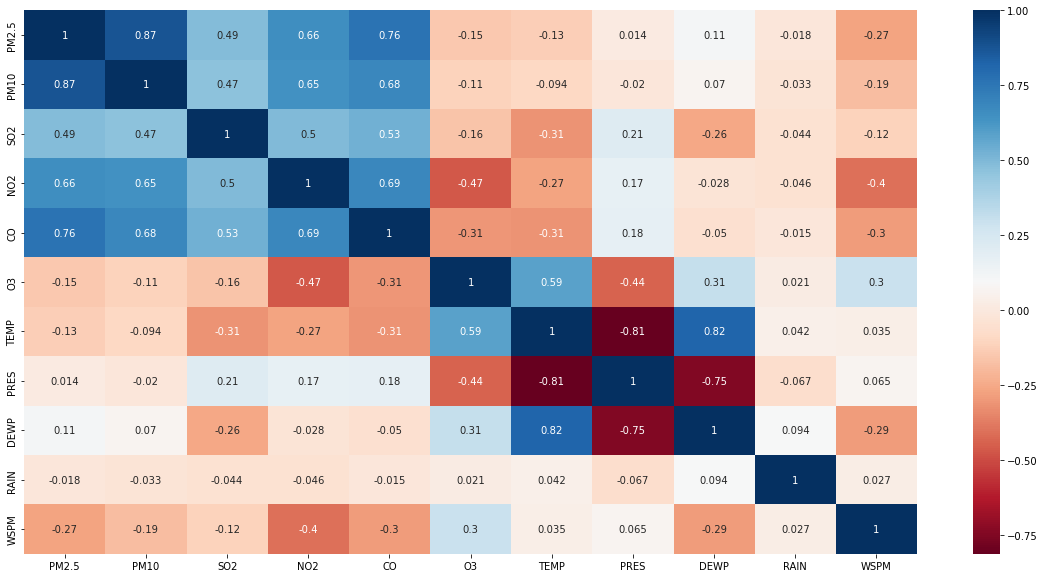

In [19]:
# Let's summarize the correlation between all these numerical features data graphically using the heat map
plt.figure(figsize = (20,10))
corr = PRSA_Data[nymerics_var].corr()
heatmap = sns.heatmap(corr, annot = True, cmap = "RdBu")

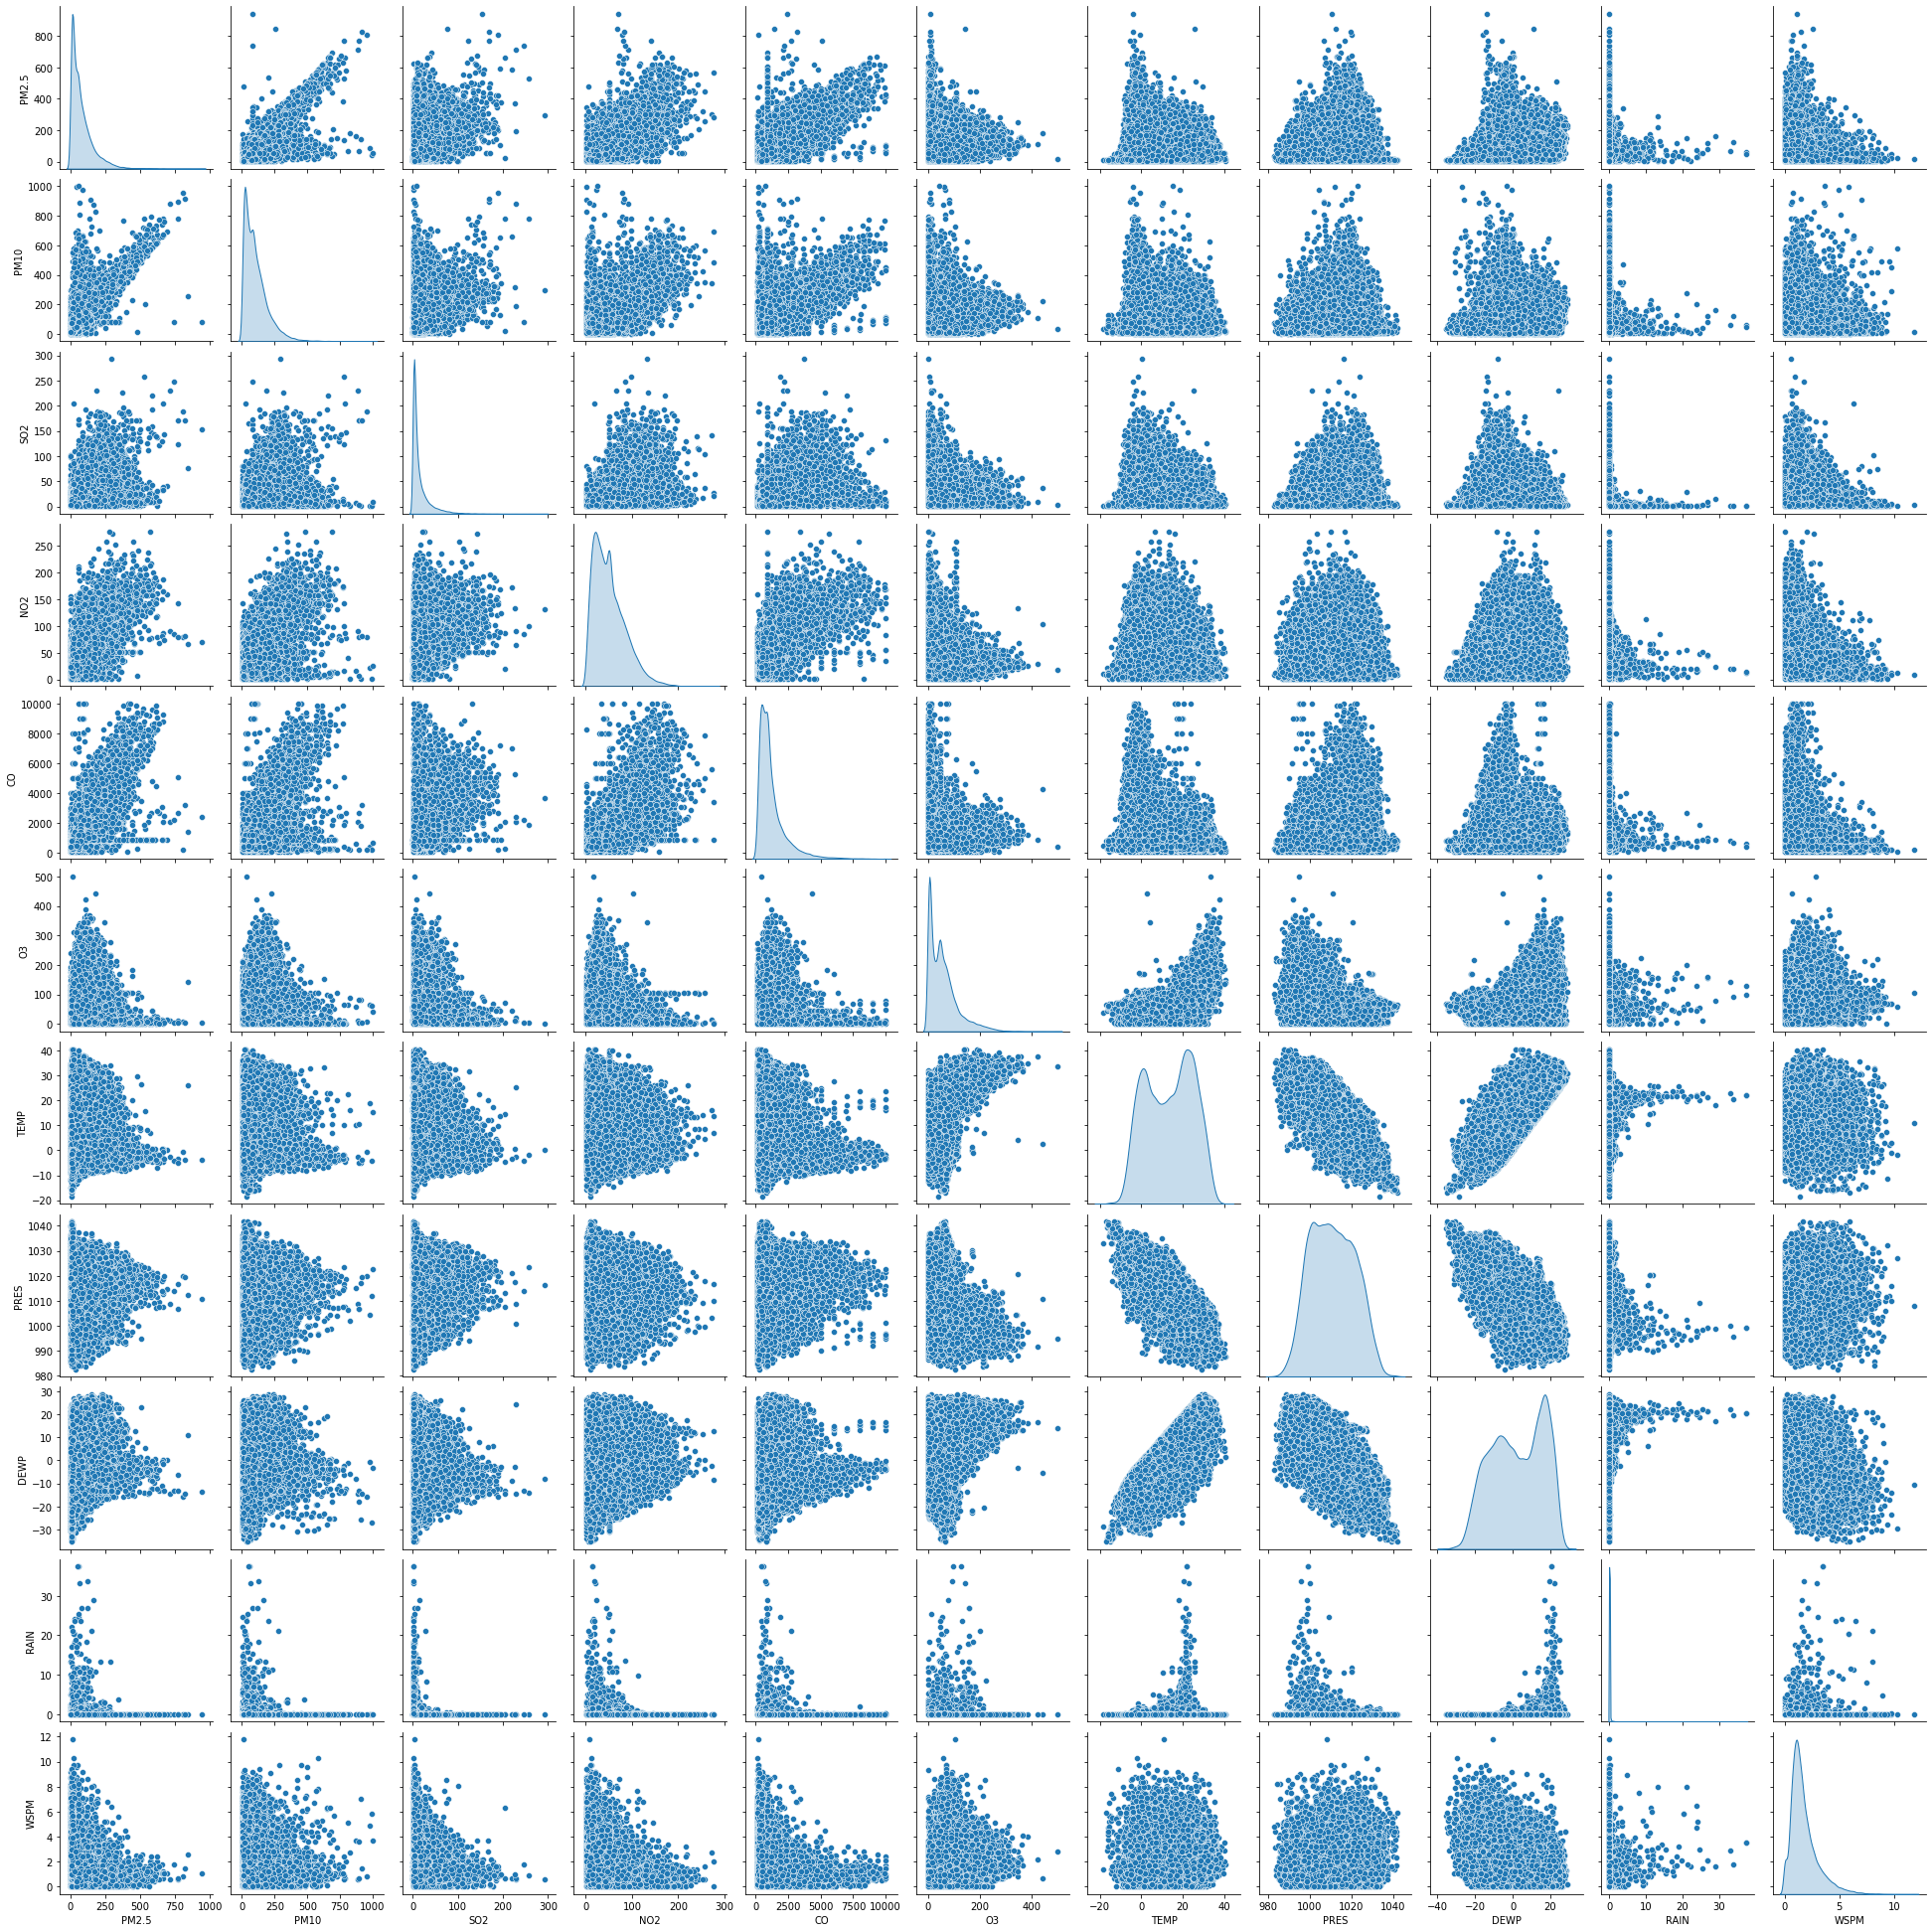

In [20]:
# Lets summarize the numerical features graphically
sns.pairplot(PRSA_Data[nymerics_var], diag_kind = 'kde')

<AxesSubplot:xlabel='hour', ylabel='PM2.5'>

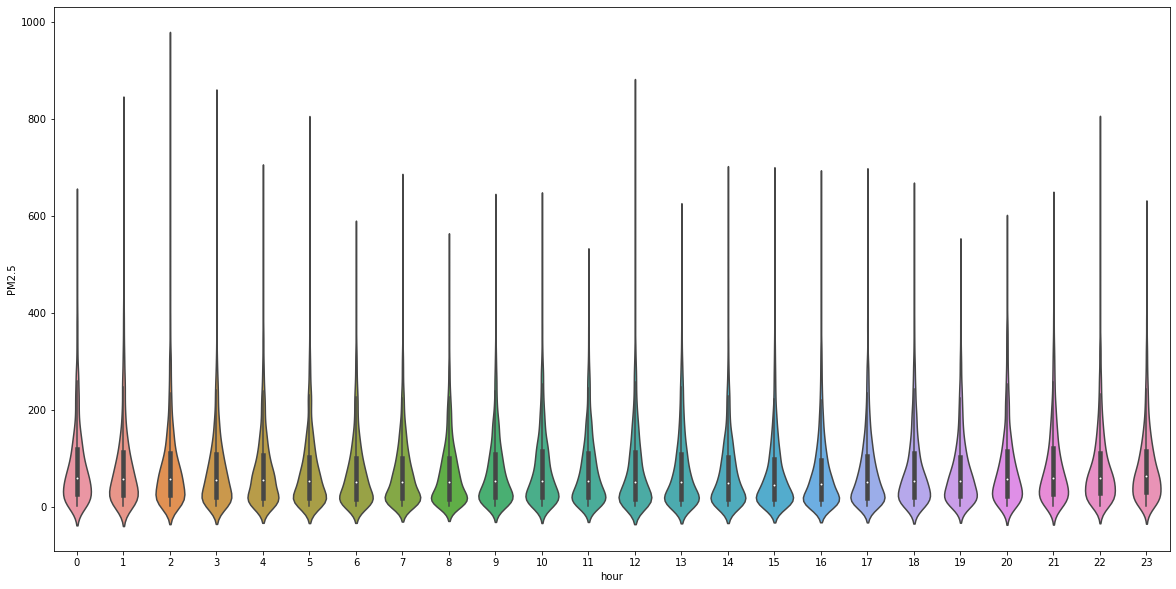

In [21]:
plt.figure(figsize = (20,10))
sns.violinplot(x = 'hour',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='day', ylabel='PM2.5'>

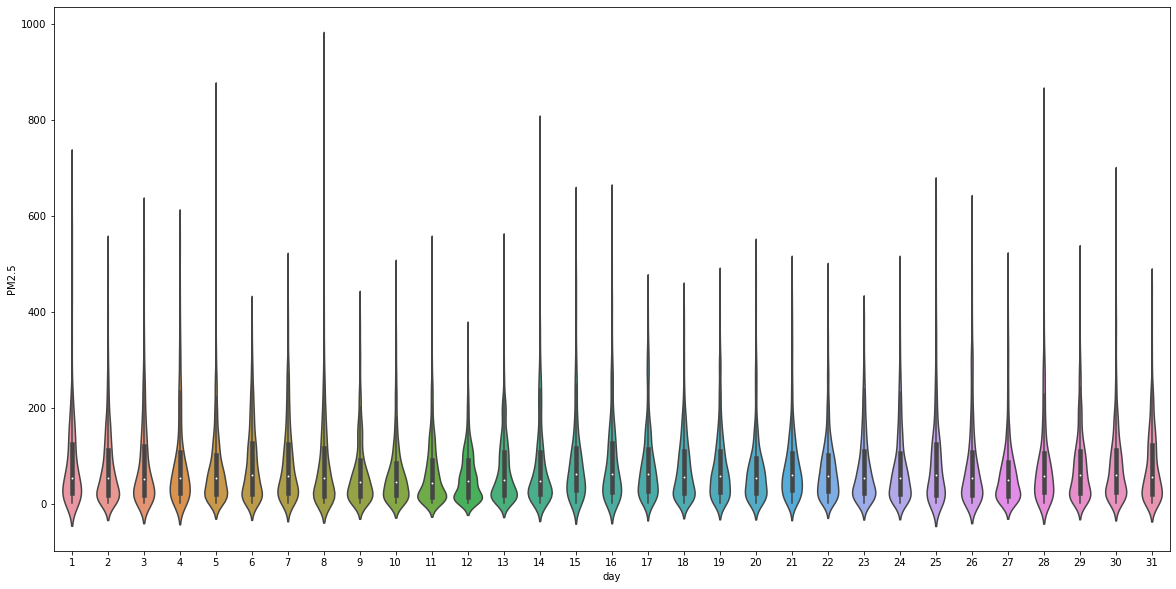

In [22]:
plt.figure(figsize = (20,10))
sns.violinplot(x = 'day',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='month', ylabel='PM2.5'>

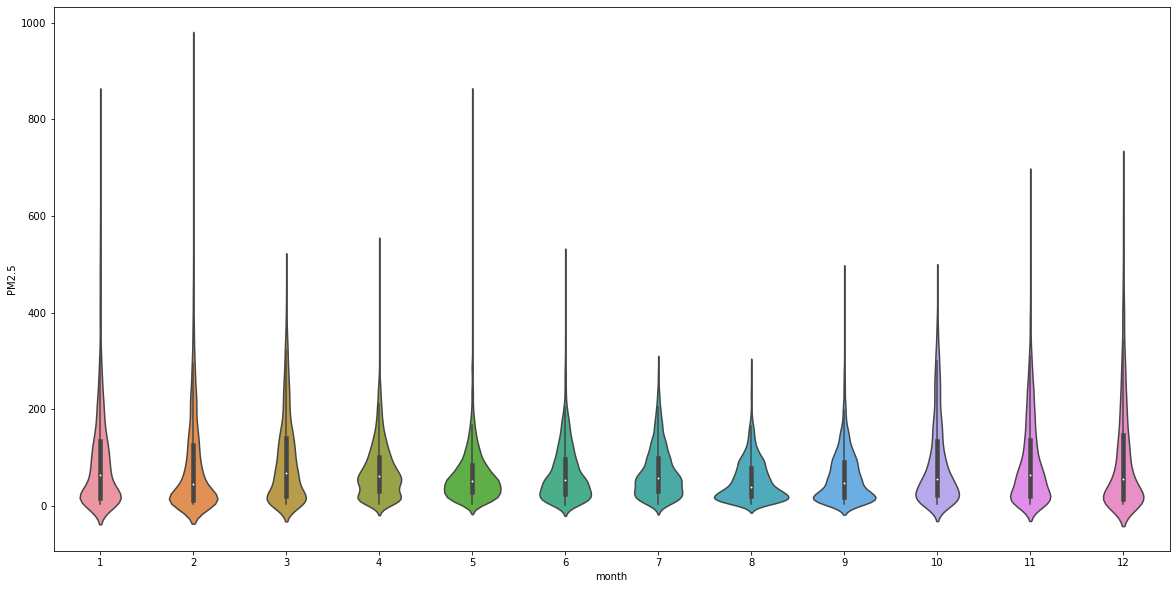

In [23]:
plt.figure(figsize = (20,10))
sns.violinplot(x = 'month',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

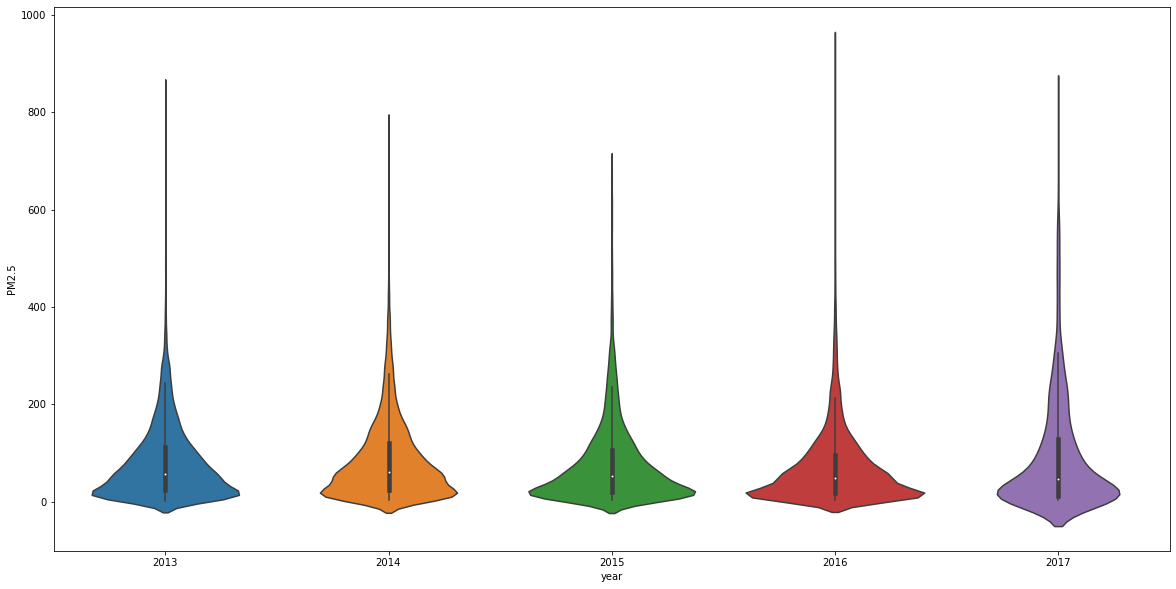

In [24]:
plt.figure(figsize = (20,10))
sns.violinplot(x = 'year',y = 'PM2.5', data = PRSA_Data)

<AxesSubplot:xlabel='wd', ylabel='PM2.5'>

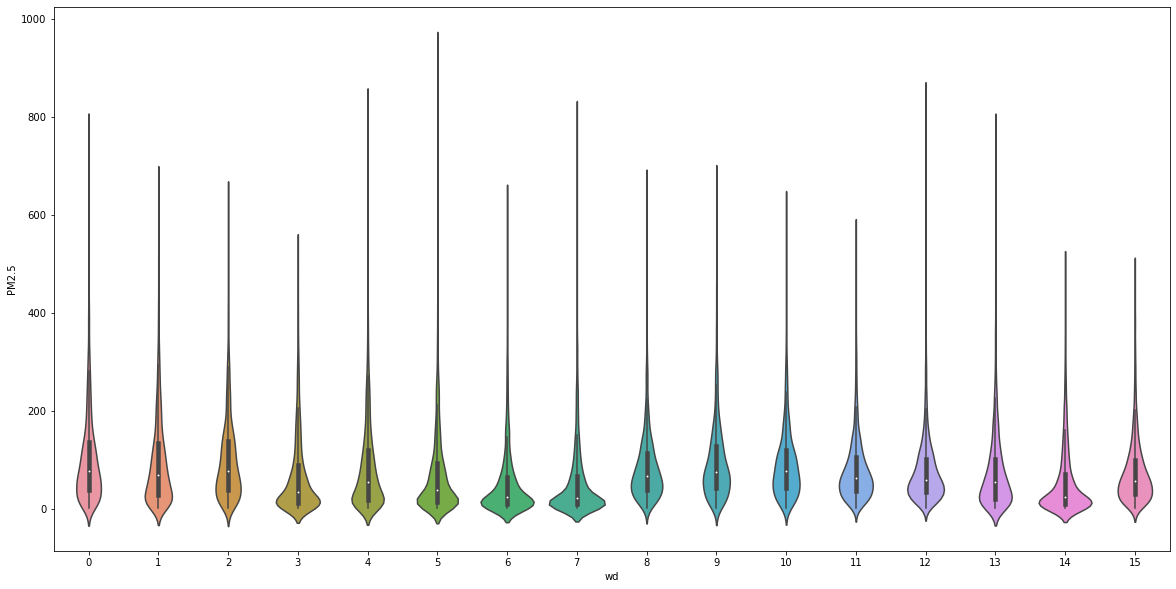

In [25]:
plt.figure(figsize = (20,10))
sns.violinplot(x = 'wd', y = 'PM2.5', data = PRSA_Data)

In [26]:
# The only target/label is: wd (wind direction)
#Obtain features and label
X = PRSA_Data.drop('wd',axis=1)
y = PRSA_Data['wd']

#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2222)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Fit and transform the training data
X_train= scaler.fit_transform(X_train)
#Only transform the test data
X_test = scaler.transform(X_test)

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [29]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64))#.reshape(-1,1))

In [30]:
print(y_train.shape)
print(X_train.shape)

torch.Size([33516])
torch.Size([33516, 26])


In [31]:
input_size = X_train.shape[1]
output_size = len(PRSA_Data['wd'].unique())
#specify the number of neuron for the hidden layers
hidden_size = [20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64))

26
16


In [32]:
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.predict = torch.nn.Linear(hidden_size[1], output_size) 
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x))
        #x = F.relu(self.hidden3(x))
        y_pred = self.predict(x)            
        return y_pred

In [33]:
model = LinearClassificationModel(input_size, hidden_size,  output_size)

In [34]:
l = nn.CrossEntropyLoss()

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [36]:
%%time

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs
num_epochs = 500

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 500 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.7965 and val_loss = 2.7941
CPU times: user 9.57 s, sys: 180 ms, total: 9.75 s
Wall time: 5.44 s


In [37]:
print(y_pred.shape)
print(y_test.shape)

torch.Size([8379, 16])
torch.Size([8379])


In [38]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
np.round(trainhist.tail(),decimals = 3)

,train_loss,val_loss,epoch
495,2.759,2.758,495
496,2.759,2.757,496
497,2.759,2.757,497
498,2.759,2.757,498
499,2.759,2.757,499


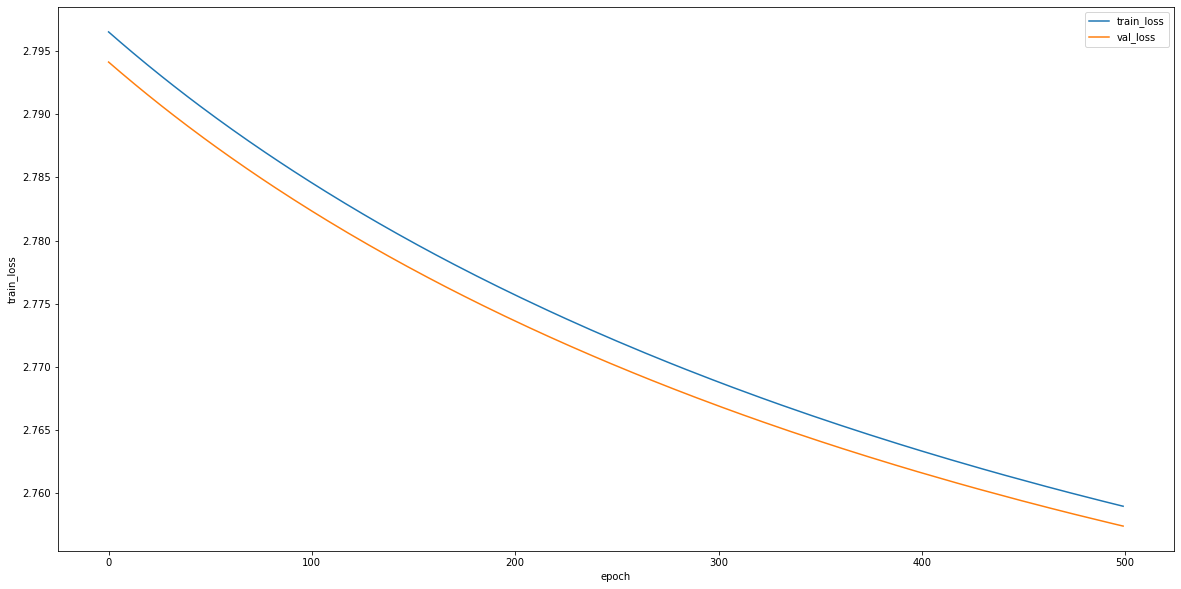

In [39]:
import matplotlib.pyplot as plt
#Plot train loss
plt.figure(figsize = (20,10))
sns.lineplot(x = 'epoch', y = 'train_loss', data = trainhist)
#Plot validation loss
sns.lineplot(x = 'epoch', y = 'val_loss', data = trainhist)
#Add legends
plt.legend(labels = ['train_loss', 'val_loss'])

In [40]:
%%time
from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 10000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)

        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 10000 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.7589 and val_loss = 2.7573
CPU times: user 3min 11s, sys: 2.99 s, total: 3min 14s
Wall time: 1min 48s


In [41]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
np.round(trainhist.tail(), decimals = 3)

,train_loss,val_loss,epoch
9995,2.649,2.659,9995
9996,2.649,2.659,9996
9997,2.649,2.659,9997
9998,2.649,2.659,9998
9999,2.649,2.659,9999


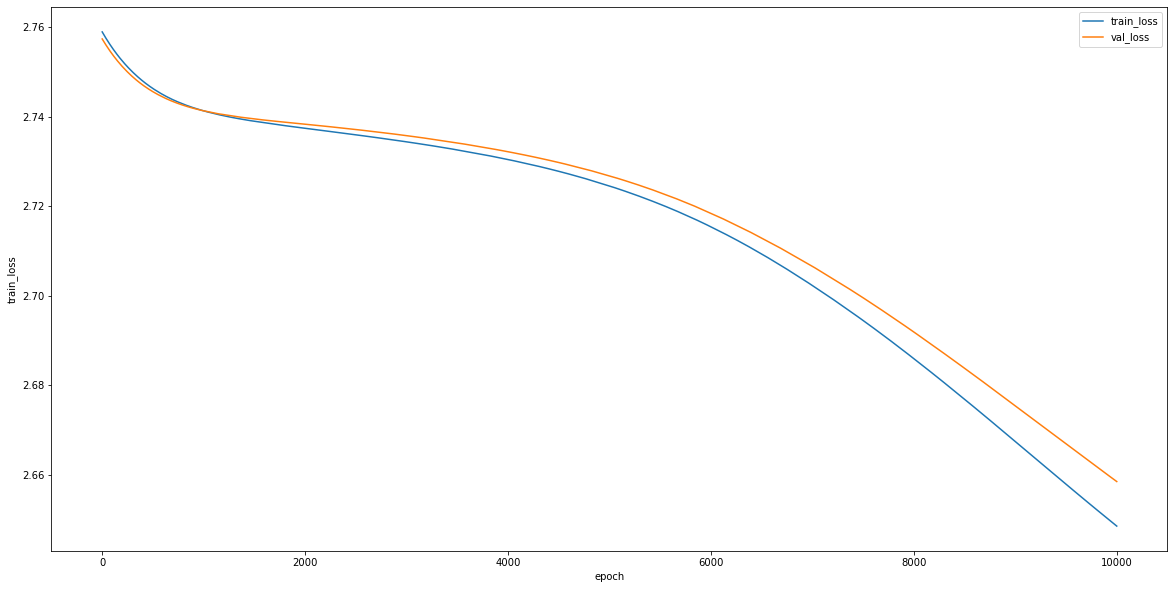

In [42]:
#Plot train loss
plt.figure(figsize = (20,10))
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

In [43]:
%%time
# define the child module class derivated from parent class of torch.nn.Module)
class LinearClassificationModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size, droprate):
        super(LinearClassificationModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hiidden1_drop = nn.Dropout(droprate)
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.hiidden2_drop = nn.Dropout(droprate)
        self.predict = torch.nn.Linear(hidden_size[1], output_size) 
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hiidden1_drop(self.hidden1(x)))  
        x = F.relu(self.hiidden2_drop(self.hidden2(x)))  
        y_pred = self.predict(x)            
        return y_pred

# Create a classification model
droprate = 0.2
model = LinearClassificationModel(input_size, hidden_size,  output_size, droprate)

# Select the Cross Entropy Loss
l = nn.CrossEntropyLoss()

#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs
num_epochs = 1000

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
        
        output = model(X_train)
        loss = l(output, y_train)
        train_loss[epoch] = loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Stop tracking the gradient by calling detach since we don't use it anymore
        y_pred = model(X_test)#.detach().numpy()
        val_loss = l(y_pred, y_test)
        valadition_loss[epoch] = val_loss.item()
        if epoch % 100 == 0:
            print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))

epoch 0, loss = 2.7859 and val_loss = 2.7828
epoch 100, loss = 2.7861 and val_loss = 2.7833
epoch 200, loss = 2.7855 and val_loss = 2.7833
epoch 300, loss = 2.7858 and val_loss = 2.7835
epoch 400, loss = 2.7853 and val_loss = 2.7825
epoch 500, loss = 2.7860 and val_loss = 2.7837
epoch 600, loss = 2.7859 and val_loss = 2.7829
epoch 700, loss = 2.7857 and val_loss = 2.7834
epoch 800, loss = 2.7856 and val_loss = 2.7826
epoch 900, loss = 2.7856 and val_loss = 2.7832
CPU times: user 25.6 s, sys: 413 ms, total: 26 s
Wall time: 13.1 s


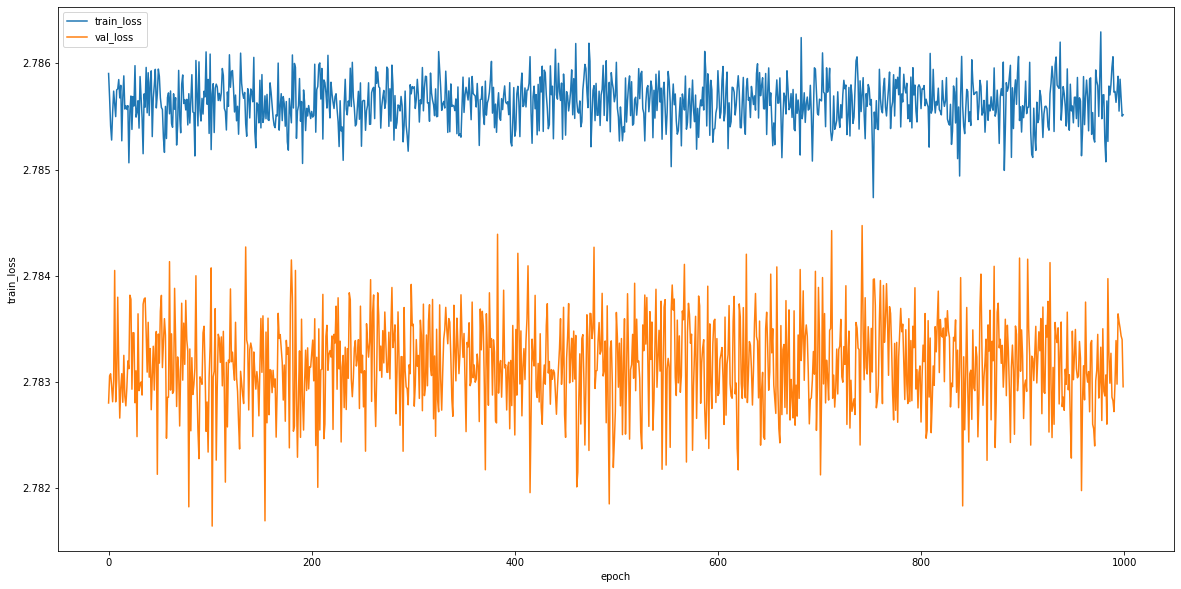

In [44]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

#Plot train loss
plt.figure(figsize = (20, 10))
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

In [45]:
# Evaluate the Model on the Test Data
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
predictions = model(X_test).detach().numpy()
df_cm = confusion_matrix(y_test,np.argmax(predictions, axis = 1))

<Figure size 1440x720 with 0 Axes>

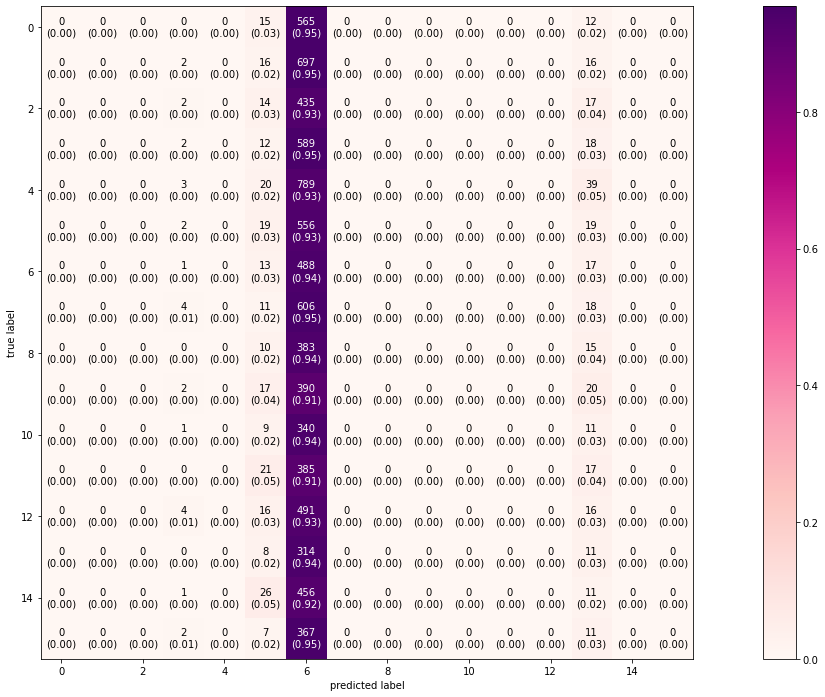

In [46]:
# Plot confusion matrix
plt.figure(figsize = (20,10))
fig, ax = plot_confusion_matrix(conf_mat = df_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True, 
                                cmap = "RdPu",
                               figsize = (25,12))

In [47]:
# Print the classification reports
print(classification_report(y_test,np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.00      0.00      0.00       731
           2       0.00      0.00      0.00       468
           3       0.08      0.00      0.01       621
           4       0.00      0.00      0.00       851
           5       0.08      0.03      0.05       596
           6       0.06      0.94      0.12       519
           7       0.00      0.00      0.00       639
           8       0.00      0.00      0.00       408
           9       0.00      0.00      0.00       429
          10       0.00      0.00      0.00       361
          11       0.00      0.00      0.00       423
          12       0.00      0.00      0.00       527
          13       0.04      0.03      0.04       333
          14       0.00      0.00      0.00       494
          15       0.00      0.00      0.00       387

    accuracy                           0.06      8379
   macro avg       0.02   